<a href="https://colab.research.google.com/github/khipucode/data_and_codes_phd/blob/main/3_3_2_heatmap_e__analisys_PM_MZM_Fig_3_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE RESULTS ARE TESTED IN

https://colab.research.google.com/drive/1EU1dDlVmjpHTSvGVl_U3emsOnEeXXvuE#scrollTo=81bFCHH1FM8E

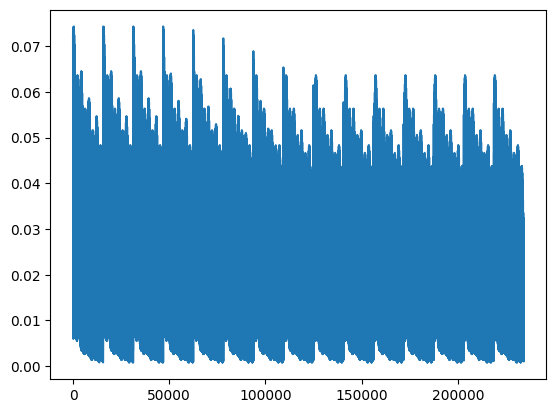

In [ ]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel functio
import matplotlib.pyplot as plt
from google.colab import files
import csv

# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.4721
noise = 10**-10; noise_dBm = 10*log10(noise)
# PM fixed parameters values
ang1pm = 0;  Upm1   =  0;        Tpm1  =  (pi*Upm1/Vpi_pm1);
# MZM fixed parameters values
ang1a  = 0;  Umz1a  = Vpi_mz1/2; Th1a  =  (pi*Umz1a/Vpi_mz1);
ang1b  = 0;  Umz1b  =  0;        Th1b  =  (pi*Umz1b/Vpi_mz1);

up_n  =  up_1 = 27
up_m  =  up_2 = 39

up_3 = up_1 + up_2 - 1
up_4 = 9 #9    # new vector reducted for analyze

ia = int((up_3-up_4)/2)   # start reduce vector in range vector
ib = int(ia + up_4)       # end reduce vector in range vector

top_n = int((up_n-1)/2)       # top n(PM) index, positive values
ind_n = range(-top_n,top_n+1) # range index for PM
top_m = int((up_m-1)/2)       # top n(MZ) index, positive values
ind_m = range(-top_m,top_m+1) # range index for MZ

#bot_Apm1 = 3;    top_Apm1  =  4.3;    ax_Apm1 = np.arange(bot_Apm1, top_Apm1, 0.1)    # top value of Apm
bot_Apm1 = 1.5;    top_Apm1  =  3.0;    ax_Apm1 = np.arange(bot_Apm1, top_Apm1, 0.1)    # top value of Apm
bot_Amz1a = 5;  top_Amz1a =  17.5;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
bot_Amz1b = 5;  top_Amz1b =  17.5;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb

#3,5    4,3
#12     14,5
#12     14,5
#temp0 = np.zeros((1,), dtype=complex)
#print(temp1)

#--------------------------end crossprod_efield----------------------------------
def crossprod_efield(up_1, Vector_1, up_2, Vector_2):
 up_vre = up_1 + up_2 - 1    # limite do vetor resultante
 #ax_crossprod_vector = []   # dominio do vetor resultante
 #top_k = int((up_vre-1)/2)
 #ax_crossprod_vector = range(-top_k,top_k+1)
 Matrix_cross_efield = np.zeros((up_1, up_vre), dtype=complex) # Tamanho da matrix
 t = 0
 k = 0
 # -------------------- begin for
 for j in range(up_1):
  temp1 = Vector_1[j]
  for i in range(up_2):
    temp2 = Vector_2[i]
    temp3 = temp1*temp2
    k     = i + t
    Matrix_cross_efield[j][k] = temp3
 #print('\n')
  t = j+1
 # -------------------- end for

 #Vector_EFre  Electric Field Resultant
 v_EFre= np.sum(Matrix_cross_efield, axis=0) #soma das colunas de campos E
 temp2 = [abs(kt) for kt in v_EFre]
 #print(Vector_EFre)
 v_Ire = np.square(temp2)  # Intensity_resultant
 #v_Ire = np.square(abs(Vector_EFre))  # Intensity_resultant # it doesn't work
 return v_EFre, v_Ire
 #return up_vre, Matrix_cross_efield, Vector_EFre, v_Ire

#--------------------------end crossprod_efield----------------------------------

file = open("v_all_values1.csv","a", newline="")
nv = 0
v_std = []
v_all_values = []
v_min_std = []

# ------------- MTX 3D STD values --------{ 1/2
len_npm = len(ax_Apm1)
len_mza = len(ax_Amz1a)
len_mzb = len(ax_Amz1b)
m_3d_std = [[[0 for i in range(len_mzb)] for i in range(len_mza)] for i in range(len_npm)]
ipm = 0
ima = 0
imb = 0
#-----------------------------------------}

for iApm in ax_Apm1:
  ima = 0
  for iAa in ax_Amz1a:  #jAa in y axis
    imb = 0
    for iAb in ax_Amz1b:

      v_pm = []
      for n in ind_n:
        J_n_iApm = besselj(n,iApm)
        temp1 = J_n_iApm*exp(j*(n*ang1pm + Tpm1))
        #print(temp1)
        v_pm.append(temp1)


      v_mz = []
      temp2 = np.zeros((1,), dtype=complex)
      for m in ind_m:
        J_m_iA1a = besselj(m,iAa)
        #print(J_m_iA1a)
        J_m_iA1b = besselj(m,iAb)
        #print(J_m_iA1b)
        temp2 = J_m_iA1a*exp(j*(m*ang1a + Th1a)) + J_m_iA1b*exp(j*(m*ang1b + Th1b))
        #print(temp2)
        v_mz.append(temp2)

      #print('MZMZ',v_mz)

      v_1 = v_pm
      v_2 = v_mz
      (v_E,v_I) = crossprod_efield(up_1, v_1, up_2, v_2)

      #print(v_E)

      v_analyze = []     # Analisys range - reducted vector
      #print(" v_analyze ",v_analyze)
      for k in range(ia,ib):
        v_analyze.append(v_I[k]) # take some elements for analyze

      #print(" V analyze ",v_analyze)
      tem_std = np.std(v_analyze)

      v_std.append(tem_std)    # vector desv standar,
                               # calculado para cada pente gerado, plotado para
                               # ver o comportamento do std ao variar os As

      #-------------------------------------------------------------------{ 2/2
      m_3d_std[ipm][ima][imb] = tem_std
      imb = imb + 1
      #-------------------------------------------------------------------}


      nv = nv + 1        # contabiliza a quantidade de comb gerados e analisados
      v_temp = []
      v_temp = [nv, round(iApm,1), round(iAa,1), round(iAb,1), round(tem_std,8)]  # preenche um vetor temporal para junttar id Apm, Aa, Ab, std
      v_all_values.append(v_temp)                                                 # matriz com os valores anteriores

      writer = csv.writer(file)  # escreve dados
      writer.writerow(v_temp)
    ima = ima + 1
  ipm = ipm + 1


file.close()

plt.plot(v_std)
plt.show()



range values 3d axis matrix ipm = 15 ima = 125 imb = 125


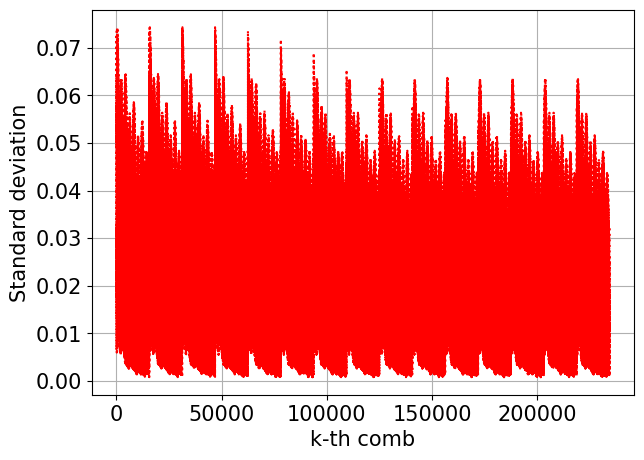

In [ ]:
print('range values 3d axis matrix','ipm =',ipm,'ima =',ima,'imb =',imb)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,5))
plt.plot(v_std, 'r:')
plt.ylabel('Standard deviation')
plt.xlabel('k-th comb')
plt.grid()
plt.show()

15
[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
plot do (1.9, MZa - MZb)


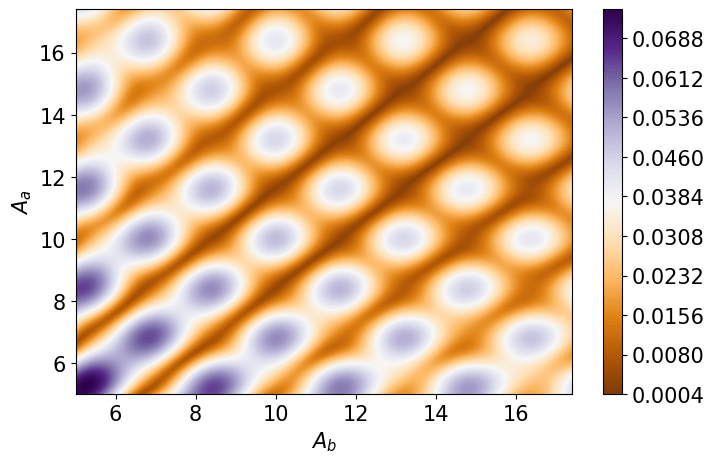

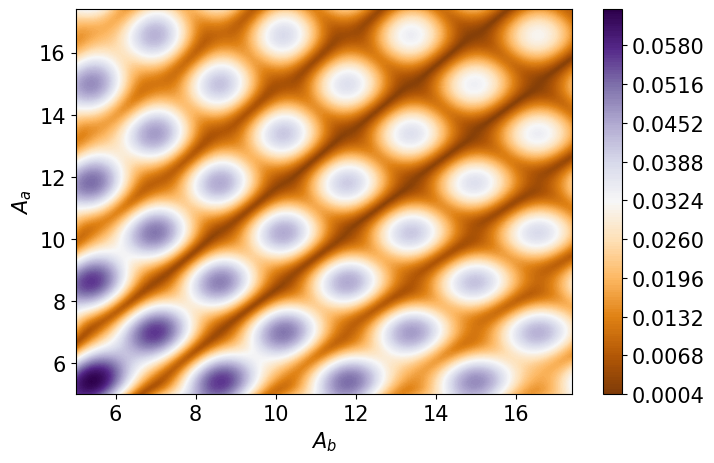

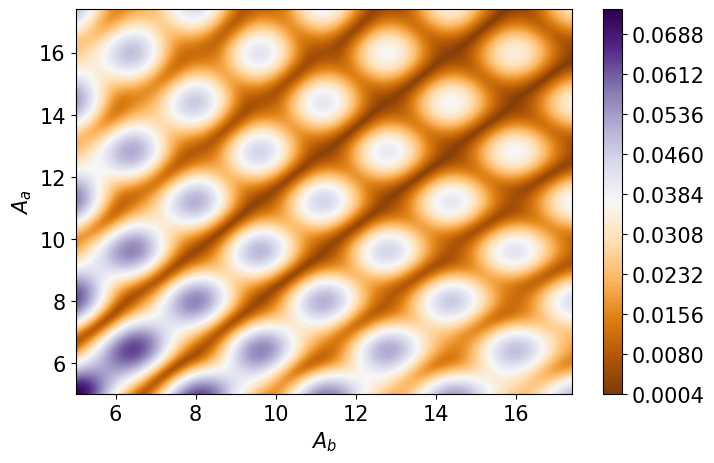

In [ ]:

'''
H0 = m_3d_std[0][:][:]
plt.imshow(H0, interpolation='none')
plt.show()
H1 = m_3d_std[1][:][:]
plt.imshow(H1, interpolation='none')
plt.show()
H2 = m_3d_std[2][:][:]
plt.imshow(H2, interpolation='none')
plt.show()
'''
H0 = m_3d_std[0][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H0, 200, cmap='PuOr')
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()

print(len(ax_Apm1))

# 1.5 - 1.6 - 1.7 - 1.8 - 1.9 - 2 - 2.1 - 2.2 - 2.3 - 2.4 - 2.5 - 2.6 - 2.7 - 2.8 - 2.9 - 3
# 0      1     2     3     4    5    6     7    8      9     10    11    12    13    14   15
# COLOR LEVEL COURVES https://matplotlib.org/stable/tutorials/colors/colormaps.html
print(ax_Apm1)

H12 = m_3d_std[14][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H12, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()

plt.savefig('grafico__PM_MZM.pdf')


print('plot do (1.9, MZa - MZb)')
H12 = m_3d_std[4][:][:]  # Um plano da matriz 3d m_3d_std
plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, H12, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('$A_a$')
plt.xlabel('$A_b$')
plt.colorbar()



125
125 125
0.029970133220307747


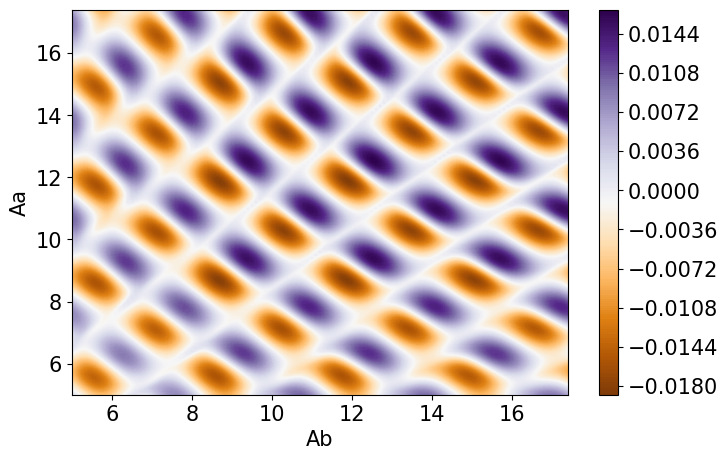

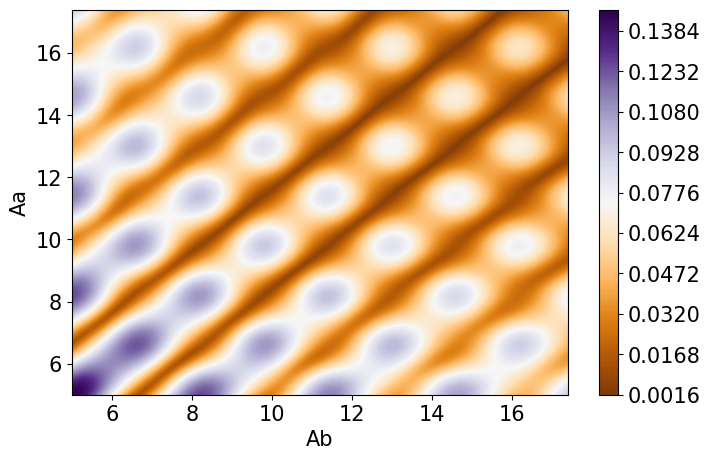

In [ ]:
print(len(H12))
print(len(ax_Amz1b), len(ax_Amz1a))
print(H12[124][124])

HR = [[0 for i in range(len_mzb)] for i in range(len_mza)]
HR2 = [[0 for i in range(len_mzb)] for i in range(len_mza)]
for j in range(len(ax_Amz1b)):
  for k in range(len(ax_Amz1a)):
    HR[j][k]=H12[j][k]-H0[j][k]
    HR2[j][k]=H12[j][k]+H0[j][k]

#print(len_mzb)

plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, HR, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('Aa')
plt.xlabel('Ab')
plt.colorbar()


plt.figure(figsize=(8,5))
plt.contourf(ax_Amz1b, ax_Amz1a, HR2, 200, cmap='PuOr')   # cmap = RdGy
plt.ylabel('Aa')
plt.xlabel('Ab')
plt.colorbar()

234375


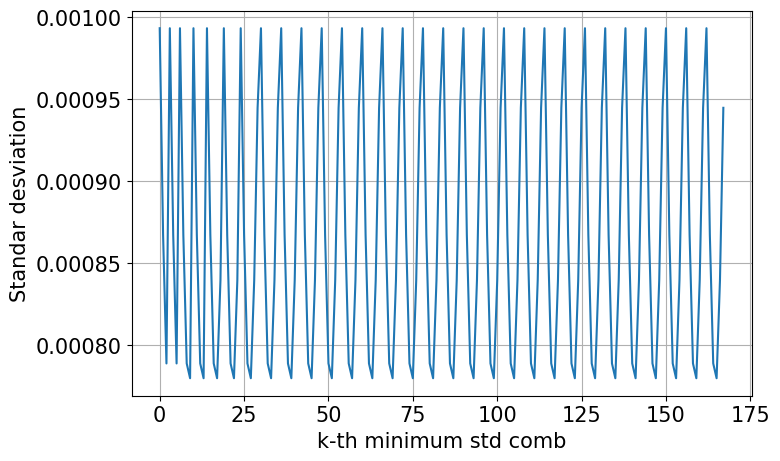

<Figure size 640x480 with 0 Axes>

In [ ]:

top_std_range  = 0.001   # Maximum STD for to consideration

tope = len(v_std)       # number of vector elements - std
v_min_std = []          # Vector for capture only minimum - std


print(tope)

for k in range(tope):
  if v_std[k] < top_std_range:    # escolhemos valores de std menores a 0.0025
    if k > 0 and k < tope-1:
      #print(arraia[k-1], arraia[k], arraia[k+1])
      if v_std[k] < v_std[k-1] and v_std[k] < v_std[k+1]:
        v_min_std.append(v_std[k])
        #print(v_std[k-1], v_std[k], v_std[k+1])
        #print("hello")

# print(v_min_std)  # print minimum std in analyzed range
plt.figure(figsize=(8,5))
plt.plot(v_min_std,'-')
plt.xlabel('k-th minimum std comb')
plt.ylabel('Standar desviation')
plt.grid()
plt.show()
plt.savefig('grafico_k_th.pdf')

tooom 234375
kkk 2363
[8.2, 8.3, 8.4, 8.5, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 9.9, 10.0, 10.0, 10.1, 10.1, 10.2, 10.2, 10.3, 10.3, 10.4, 10.9, 11.0, 11.1, 11.2, 11.3, 11.3, 11.4, 11.4, 11.5, 11.5, 11.6, 11.6, 11.7, 11.7, 11.8, 11.8, 11.9, 11.9, 12.0, 12.0, 12.1, 12.1, 12.2, 12.2, 12.3, 12.3, 12.4, 12.5, 12.6, 12.7, 12.7, 12.8, 12.8, 12.9, 12.9, 13.0, 13.0, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.4, 13.4, 13.5, 13.5, 13.6, 13.6, 13.7, 13.7, 13.8, 13.8, 13.9, 13.9, 14.0, 14.0, 14.1, 14.1, 14.2, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.6, 14.6, 14.7, 14.7, 14.8, 14.8, 14.9, 14.9, 15.0, 15.0, 15.1, 15.1, 15.2, 15.2, 15.3, 15.3, 15.4, 15.4, 15.5, 15.5, 15.6, 15.6, 15.7, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.2, 17.3, 17.3, 17.4, 17.4, 8.1, 8.2, 8.3, 8.4, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.8, 9.9, 9.9, 10.0, 10.0, 10.1, 10.1, 10.2, 10.2, 10.3, 10.8, 10.9, 11.0, 11.1, 11.2, 11.2, 11.3, 11.3, 11.4, 11.4, 11.5, 11.5, 11.6, 11.6, 11.7,

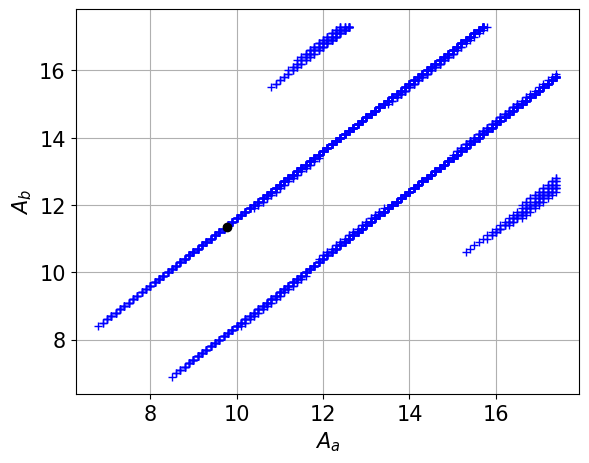

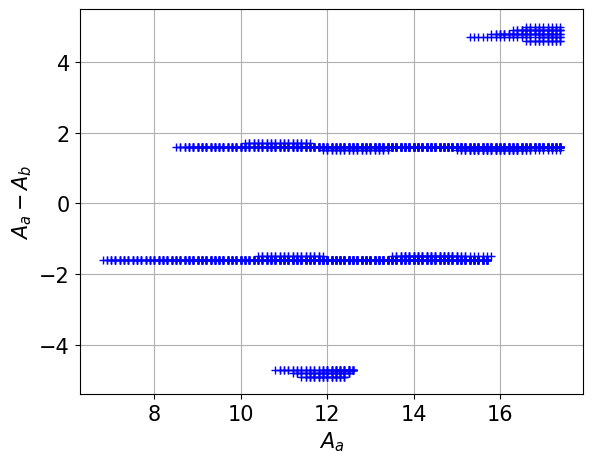

"\nfig = plt.figure()\nax = fig.gca()\nax.set_xticks(np.arange(0, 1, 0.1))\nax.set_yticks(np.arange(0, 1., 0.1))\nplt.grid(color = 'green', linestyle = '--', linewidth = 0.5)\n#plt.grid(True)\nplt.show()\n"

In [ ]:
top_std_range  = 0.005
matrix2d = v_all_values
tom  = len(matrix2d)
v2d_min_std = []
print('tooom', tom)
k = 0
for i in range(tom):
  if v_std[i] < top_std_range:
    if i > 1:
      if matrix2d[i-1][4] < matrix2d[i-2][4] and matrix2d[i-1][4] < matrix2d[i][4]:
        #print(matrix2d[i-1][:])
        v2d_min_std.append(matrix2d[i-1][:])
        k = k + 1
    #if ii == 10:
    #print(v_all_values[10])
      #
#print(matrix2d[0][4])
#print(v2d_min_std)
print('kkk',k)
x = []
y = []
z = []
for j in range(k):
  tm1 = v2d_min_std[j][2]
  x.append(tm1)
  tm2 = v2d_min_std[j][3]
  y.append(tm2)
  z.append(tm1 - tm2)   # deferença das voltagems Aa e Ab



print(x)
plt.figure(figsize=(6.5,5))
plt.plot(x,y,'b+')
plt.plot(9.78,11.35,'ko')
plt.xlabel('$A_a $')
plt.ylabel('$A_b $')
plt.grid()
plt.show()

plt.figure(figsize=(6.5,5))
plt.plot(x,z,'b+')
plt.xlabel('$A_a $')
plt.ylabel('$A_a - A_b $')
plt.grid()
plt.show()

'''
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
#plt.grid(True)
plt.show()
'''



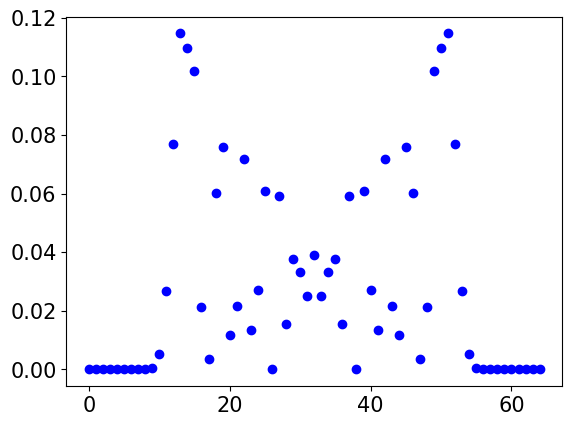

In [ ]:
plt.plot(v_I,'bo')
plt.show()

##TESTING CODE

[[[1, 4, 9], [16, 25, 36], [49, 64, 81]], [[100, 121, 144], [169, 196, 225], [256, 289, 324]], [[361, 400, 441], [484, 529, 576], [625, 676, 729]]]
[[1, 4, 9], [16, 25, 36], [49, 64, 81]]
(15, 125, 125)
[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1
 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1 17.2 17.3 17.4]


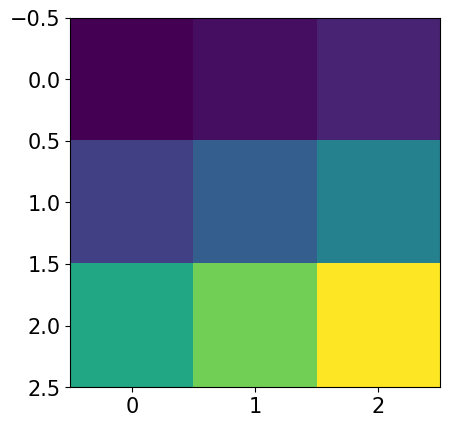

In [ ]:
# FILL 3D MATRIX AND PLOT IN CONTOUR 2D
n1 = 3
n2 = 3
n3 = 3
m_3d = [[[0 for i in range(n1)] for i in range(n2)] for i in range(n3)]

pt = 1
for i in range(n3):
  for j in range(n2):
    for k in range(n1):
      m_3d[i][j][k] = pt**2
      pt = pt +1

print(m_3d)
print(m_3d[0][:][:])
H10 = m_3d[0][:][:]

print(np.shape(m_3d_std))
print(ax_Amz1a)

plt.imshow(H10, interpolation='none')
plt.show()


In [ ]:
lista = []
for i in range(10):
  k = [i,2*i,3*i]
  lista.append([i, i+1, k[0],k[1],k[2]])

print(lista)

print(round(3.33333,5))
print(v_all_values)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[17, 40, 63, 86, 109, 131, 154, 177, 200, 223, 246, 268, 291, 314, 337, 360, 383]
 TTT  23
 TTT  23
 TTT  23
 TTT  22
 TTT  23
 TTT  23
 TTT  23
 TTT  23
 TTT  23
 TTT  22
 TTT  23
 TTT  23
 TTT  23
 TTT  23
 TTT  23
2.551


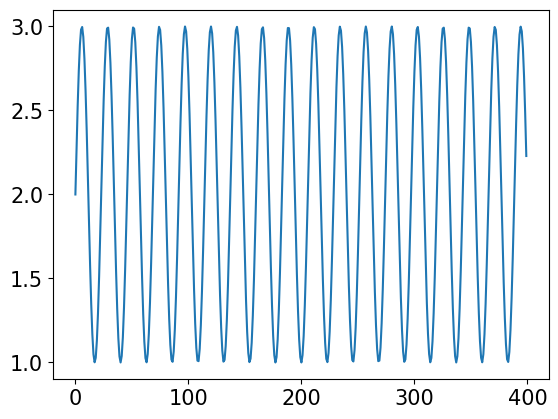

In [ ]:

arraia = []
peri = []
top = 400
for i in range(top):
  x = 110*i/top
  arraia.append(round(np.sin(x)+2,3))
  if i > 1:
    if arraia[i-1]<arraia[i-2] and arraia[i-1]<arraia[i]:
      peri.append(i-1)
      #print(arraia[i]-arraia[i-1])


print(peri)
for j in range(len(peri)):
  if j >1:
    print(' TTT ', peri[j] - peri[j-1])

tope = len(arraia)
for k in range(tope-800):
  #print(k)
  if k > 0 and k < tope-1:
    #print(arraia[k-1], arraia[k], arraia[k+1])
    if arraia[k] < arraia[k-1] and arraia[k] < arraia[k+1]:
      #print(arraia[k-1], arraia[k], arraia[k+1])
      print("hello")


print(arraia[55])

plt.plot(arraia)